In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [5]:
data = pd.read_excel('data2.xlsx', index_col='순번')
data.head()

,H,S,V,R,G,B,l,a,b,계절,봄,여름,가을,겨울,쿨웜
순번,,,,,,,,,,,,,,,
1,7,11,84,215,194,191,80,7,4,1,1,0,0,0,1
2,354,50,85,218,108,119,59,45,15,1,1,0,0,0,1
3,11,65,85,218,103,76,58,45,38,1,1,0,0,0,1
4,1,65,82,210,76,73,52,54,32,1,1,0,0,0,1
5,36,79,83,211,143,44,65,21,60,1,1,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split

x_data = data[['H', 'S', 'V']]
y_data = data['쿨웜']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=777)


In [ ]:
# 적절한 n_neighbors 찾기

# n_neighbors 적어지면 -> model의 결정경계가 복잡 -> overfitting
# n_neighbors 많아지면 -> model의 결정경계가 단순 -> underfitting

In [13]:
train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())

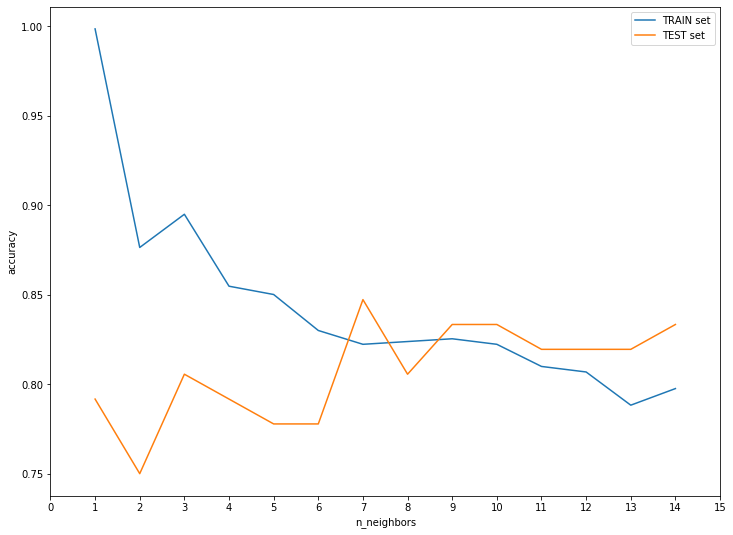

In [14]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [28]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("clf.score             : {0:.3f}".format(knn.score(x_train, y_train)))
print("(pred == y_test) score: {0:.3f}".format((prediction==y_test).mean()))
# cross_val_score가 낮게나오면 overfitting 된 것
print("cross_val_score       : {0:.3f}".format(cross_val_score(knn, x_train, y_train, cv=10).mean()))

clf.score             : 0.850
(pred == y_test) score: 0.778
cross_val_score       : 0.762


In [25]:
from sklearn import metrics

y_predict = knn.predict(x_test)
knn_report = metrics.classification_report(y_test, y_predict)
print(knn_report)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.79      0.82      0.80        40

    accuracy                           0.78        72
   macro avg       0.78      0.77      0.77        72
weighted avg       0.78      0.78      0.78        72



C:\Users\user\anaconda3\envs\GAN\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


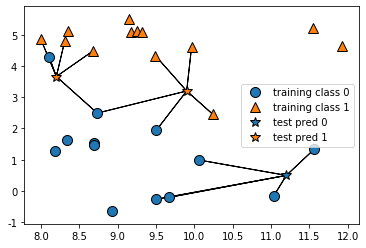

In [39]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=5)